# Von Karman beam around the buckled state


We are using the Taylor coefficients extracted via SSMTool using the graph style parametrization. 

In [1]:
import numpy as np
from scipy.io import loadmat

In [2]:
import matplotlib.pyplot as plt

In [3]:
from taylor_to_pade.matlab_integration import *
from taylor_to_pade.approximant import TaylorSeries, PadeApproximant

## Define the helper functions to extract Matlab coefficients

In [4]:
def get_coeff(expr):
    return expr.as_terms()[0][0][1][0][0] + 1j*expr.as_terms()[0][0][1][0][1]

In [5]:
def generate_parametrization(list_param, order_num=3, order_denom=3, use_robust = False):
    parametrization_pade = []
    for p in list_param:
        pad = taylor_to_pade.approximant.PadeApproximant(order_numerator=order_num,
                                                         order_denominator=order_denom,
                                                         base = [p1, p2])
        pad.initialize_from_taylor(p.coefficients, use_robust = use_robust)
        parametrization_pade.append(pad)
    return parametrization_pade

In [6]:
def return_parametrization_up_to_order_Taylor(parametrization_expressions, max_order = 30):
    parametrization = []
    for p in parametrization_expressions:
        coeff = taylor_to_pade.matlab_integration.extract_coefficients(p[0], [p1, p2], max_order)
        parametrization.append(TaylorSeries(coeff, max_order, base = [p1, p2]))
    return parametrization

In [7]:
def reduced_dynamics(frequency, damping, order_num = 3, order_denom = 3, use_robust = False):
    frequency_Pade = PadeApproximant(order_denominator=order_num, order_numerator=order_num, base = radial_variables)
    damping_Pade = PadeApproximant(order_denominator=order_num, order_numerator=order_num, base = radial_variables)
    damping_Pade.initialize_from_taylor(damping.coefficients, use_robust = use_robust)
    frequency_Pade.initialize_from_taylor(frequency.coefficients, use_robust = use_robust)
    return frequency_Pade, damping_Pade

In [8]:
def generate_parametrization(list_param, order_num=3, order_denom=3, use_robust = False):
    parametrization_pade = []
    for p in list_param:
        pad = taylor_to_pade.approximant.PadeApproximant(order_numerator=order_num,
                                                         order_denominator=order_denom,
                                                         base = [p1, p2])
        pad.initialize_from_taylor(p.coefficients, use_robust = use_robust)
        parametrization_pade.append(pad)
    return parametrization_pade

## Load SSM coefficients

In [9]:
import numpy as np
from scipy.io import loadmat
mat = loadmat('vonkarman_buckled_mid_load_order18.mat')


In [10]:
import sympy as sy
p1, p2 = sy.symbols('p_1 p_2')
var = np.array([p1,p2]).reshape(-1,1)

In [11]:
%load_ext autoreload
%autoreload 2
%aimport taylor_to_pade


In [12]:
import taylor_to_pade

In [13]:
mat['W_0'] = mat['W0']
mat['R_0'] = mat['R0']
del mat['R0']
del mat['W0']

In [14]:
def unpack_it(variables, coeff, exps):
    p1, p2 = variables
    val = 0
    for ex, cc in zip(exps,coeff):
        val += cc * p1**ex[0] * p2 ** ex[1]
    return val

In [15]:
matt = mat['W_0'][0]
W0 = taylor_to_pade.matlab_integration.extract_gen_new(mat, 'W_0') # get reduced dyn
parametrization_expressions = reduced_to_full(var, W0)

In [16]:
outdof = 34

In [17]:
parametrization_expressions = [parametrization_expressions[outdof],
            parametrization_expressions[17],
            parametrization_expressions[18]]

In [18]:
R0 = taylor_to_pade.matlab_integration.extract_gen_new(mat, 'R_0') # get reduced dyn
reduced_dynamics_expressions = taylor_to_pade.matlab_integration.reduced_to_full(var, R0)

### Extract the Taylor series

In [31]:
parametrization_18 = return_parametrization_up_to_order_Taylor(parametrization_expressions,
                                                            max_order = 18)
red_dynamics_18 = return_parametrization_up_to_order_Taylor(reduced_dynamics_expressions,max_order = 18)
                                                                                                                     



## Visualize the reduced dynamics:

In [32]:
xx = np.linspace(-1e-1, 1e-1, 100)

XX, YY = np.meshgrid(xx, xx)


In [33]:
pts = np.vstack((XX.ravel(), YY.ravel())).T

In [34]:
parametrization_pade = generate_parametrization(parametrization_18,
                                                order_num = 3,
                                                order_denom = 3,
                                                use_robust = True)


In [35]:
UU = red_dynamics_18[0].evaluate(pts).reshape(XX.shape)
VV = red_dynamics_18[1].evaluate(pts).reshape(XX.shape)
zz = parametrization_18[0].evaluate(pts).reshape(XX.shape)
zz_pade = parametrization_pade[0].evaluate(pts).reshape(XX.shape)


(-0.1, 0.1)

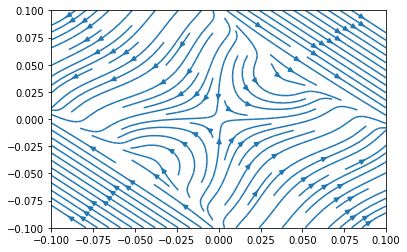

In [36]:
plt.streamplot(XX, YY, UU, VV)
plt.xlim(xx.min(), xx.max())
plt.ylim(xx.min(), xx.max())


In [37]:
red_dyn_pade = generate_parametrization(red_dynamics_18, order_num = 6, order_denom = 6, use_robust = True)


In [38]:
xx = np.linspace(-1e-1, 1e-1, 100)

XX, YY = np.meshgrid(xx, xx)


In [39]:
pts = np.vstack((XX.ravel(), YY.ravel())).T

In [40]:
UU = red_dyn_pade[0].evaluate(pts).reshape(XX.shape)
VV = red_dyn_pade[1].evaluate(pts).reshape(XX.shape)

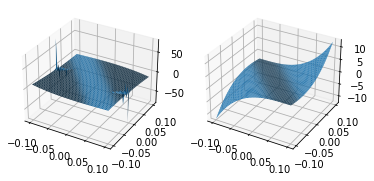

In [41]:
fig = plt.figure()
ax = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')
#ax.plot_surface(TT1, TT2, pad_18_ro)
#ax.plot_surface(TT1, TT2, pad_9)
ax.plot_surface(XX, YY, UU)
ax2.plot_surface(XX, YY, VV)

(-0.1, 0.1)

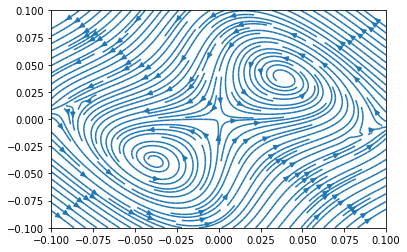

In [42]:
plt.streamplot(XX, YY, UU, VV, density = 2)
plt.xlim(xx.min(), xx.max())
plt.ylim(xx.min(), xx.max())


## Load the unforced data

In [43]:
dat = loadmat('dataVK_buckled_unforced_mid.mat')

In [44]:
W_1 = W0[0]['coeffs']

$$
\xi w_1 = \omega $$

In [45]:
plus_ = dat['sol_plus']- dat['unstable_fp'].T
minus_ = dat['sol_minus'] - dat['unstable_fp'].T


In [46]:
reduced_plus = np.linalg.lstsq(W_1, plus_.T)[0]
reduced_minus = np.linalg.lstsq(W_1, minus_.T)[0]


/var/folders/sc/g850kkhs2zv9ndc20ntwgf540000gn/T/ipykernel_5805/3020135435.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reduced_plus = np.linalg.lstsq(W_1, plus_.T)[0]
/var/folders/sc/g850kkhs2zv9ndc20ntwgf540000gn/T/ipykernel_5805/3020135435.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reduced_minus = np.linalg.lstsq(W_1, minus_.T)[0]


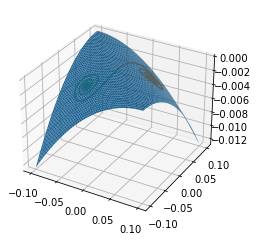

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#ax.plot_surface(TT1, TT2, pad_18_ro)
#ax.plot_surface(TT1, TT2, pad_9)
ax.plot_surface(XX, YY, zz_pade)
ax.plot(reduced_plus[0,:], reduced_plus[1,:], plus_[:,outdof])
ax.plot(reduced_minus[0,:], reduced_minus[1,:], minus_[:,outdof])

In [48]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 13, "font.family": "serif",})
plt.rcParams.update({'text.latex.preamble':r"\usepackage{amsmath}"})

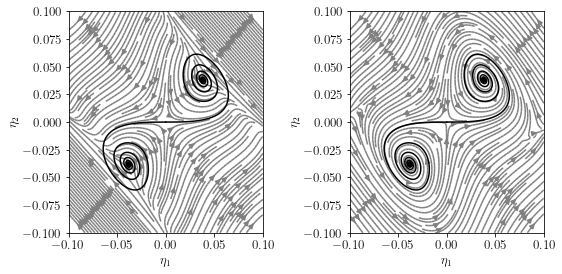

In [49]:
ff = plt.figure(figsize = (8, 4))
ax = ff.add_subplot(121)
ax2 = ff.add_subplot(122)
UU = red_dynamics_18[0].evaluate(pts).reshape(XX.shape)
VV = red_dynamics_18[1].evaluate(pts).reshape(XX.shape)
streamplotobject_taylor = ax.streamplot(XX, YY, UU, VV, density = 2, color='grey')
ax.plot(reduced_plus[1,:], reduced_plus[0,:], c= 'black')
ax.plot(reduced_minus[1,:], reduced_minus[0,:], c= 'black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(xx.min(), xx.max())

UU = red_dyn_pade[0].evaluate(pts).reshape(XX.shape)
VV = red_dyn_pade[1].evaluate(pts).reshape(XX.shape)

streamplotobject_pade = ax2.streamplot(XX, YY, UU, VV, density = 2, color='grey')
ax2.plot(reduced_plus[1,:], reduced_plus[0,:] , c= 'black')
ax2.plot(reduced_minus[1,:], reduced_minus[0,:], c= 'black')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(xx.min(), xx.max())
ax.set_xlabel('$\eta_1$')
ax2.set_xlabel('$\eta_1$')
ax.set_ylabel('$\eta_2$')
ax2.set_ylabel('$\eta_2$')
plt.tight_layout()


In [50]:
ic_plus_reduced = reduced_plus[:,0][::-1]
ic_minus_reduced = reduced_minus[:,0][::-1]


In [51]:
def odeint_pade(t, x):
    return np.array([red_dyn_pade[0].evaluate(x.reshape(1,-1)),
                   red_dyn_pade[1].evaluate(x.reshape(1,-1))]).ravel()

def odeint_tay(t, x):
    return np.array([red_dynamics_18[0].evaluate(x.reshape(1,-1)),
                   red_dynamics_18[1].evaluate(x.reshape(1,-1))]).ravel()

In [52]:
sy.Matrix([r.polynomial for r in red_dynamics_18]).jacobian([p1,p2]).subs([(p1, 0), (p2,0)])

Matrix([
[23.4842291125072,                 0],
[               0, -23.5294698288897]])

In [53]:
coeffs_poly_1 = dict(red_dynamics_18[0].polynomial.as_coefficients_dict())
coeffs_poly_2 = dict(red_dynamics_18[1].polynomial.as_coefficients_dict())

In [54]:
from scipy.integrate import solve_ivp

In [ ]:
teval = np.linspace(0, 2, 2000)
sol_plus_pade = solve_ivp(odeint_pade, [0,2], ic_plus_reduced, t_eval = teval, method = 'DOP853')
sol_minus_pade = solve_ivp(odeint_pade, [0,2], ic_minus_reduced, t_eval = teval, method = 'DOP853')


sol_plus_taylor = solve_ivp(odeint_tay, [0,2], ic_plus_reduced, t_eval = teval, method = 'DOP853')
sol_minus_taylor = solve_ivp(odeint_tay, [0,2], ic_minus_reduced, t_eval = teval, method = 'DOP853')


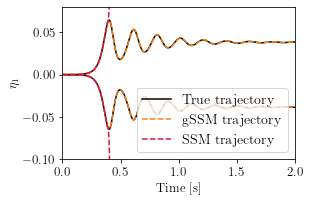

In [56]:
ff = plt.figure(figsize = (4.5,3))
ax = ff.add_subplot(111)

ax.plot(teval, reduced_minus[1,:], '-', c='black', label = 'True trajectory')

ax.plot(sol_minus_pade.t, sol_minus_pade.y[0,:], '--', c='C1', label = 'gSSM trajectory')
ax.plot(sol_minus_taylor.t, sol_minus_taylor.y[0,:], '--', c='crimson', label = 'SSM trajectory')


ax.plot(teval, reduced_plus[1,:], '-', c='black')
ax.plot(sol_plus_pade.t, sol_plus_pade.y[0,:], '--', c='C1')
ax.plot(sol_plus_taylor.t, sol_plus_taylor.y[0,:], '--', c='crimson')

ax.set_xlabel('Time [s]')
ax.set_ylabel('$\eta_1$')
ax.set_ylim(-0.1, 0.08)
ax.set_xlim(0, 2)
ax.legend(loc='lower right', fontsize = 14.25)
plt.tight_layout()


## Chaotic forcing

In [57]:
dat = loadmat('dataVK_buckled_forced_chaotic_mid.mat')
W_1 = W0[0]['coeffs']
traj1 = dat['sol_ep1']- dat['unstable_fp'].T
traj2 = dat['sol_ep2'] - dat['unstable_fp'].T
reduced_traj1 = np.linalg.lstsq(W_1, traj1.T)[0]
reduced_traj2 = np.linalg.lstsq(W_1, traj2.T)[0]


/var/folders/sc/g850kkhs2zv9ndc20ntwgf540000gn/T/ipykernel_5805/3420304566.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reduced_traj1 = np.linalg.lstsq(W_1, traj1.T)[0]
/var/folders/sc/g850kkhs2zv9ndc20ntwgf540000gn/T/ipykernel_5805/3420304566.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reduced_traj2 = np.linalg.lstsq(W_1, traj2.T)[0]


In [58]:
ic_chaot1_reduced = reduced_traj1[:,0][::-1]
ic_chaot2_reduced = reduced_traj2[:,0][::-1]


In [60]:
frq_ = 25.30769231

In [61]:
timescale = 2*np.pi/frq_
numberPeriods = 200
numberPointsPerPeriod = 100
endTime = numberPeriods*timescale;
nSamp = numberPeriods*numberPointsPerPeriod+1
dt = endTime/(nSamp-1);
timespan = np.linspace(0, endTime, nSamp)

First the Taylor dynamics:

In [289]:
amp_ssm =  0.18730800000000003
amp_ssm = 0.2267033242968807
amp_full = 21.1154
def odeint_pade_forced(t, x):
    phase = frq_ * t
    autonomous = np.array([red_dyn_pade[0].evaluate(x.reshape(1,-1)),
                   red_dyn_pade[1].evaluate(x.reshape(1,-1))]).ravel()
    return autonomous + np.array([amp_ssm, -amp_ssm])*np.cos(frq_ * t)




In [325]:
def odeint_taylor_forced(t, x):
    autonomous = np.array([red_dynamics_18[0].evaluate(x.reshape(1,-1)),
                   red_dynamics_18[1].evaluate(x.reshape(1,-1))]).ravel()
    return autonomous + np.array([0.1862, -0.1859]) * np.cos(frq_ * t)
timescale = 2*np.pi/frq_
numberPeriods = 200
numberPointsPerPeriod = 100
endTime = numberPeriods*timescale;
nSamp = numberPeriods*numberPointsPerPeriod+1
dt = endTime/(nSamp-1);
timespan = np.linspace(0, endTime, nSamp)

In [257]:
sol_chaotic_taylor_1 = solve_ivp(odeint_taylor_forced, [0,0.1], ic_chaot1_reduced,method = 'DOP853', rtol = 1e-8, atol = 1e-10)
sol_chaotic_taylor_2 = solve_ivp(odeint_taylor_forced, [0,.1], ic_chaot2_reduced, method = 'DOP853', rtol = 1e-8, atol = 1e-10)

In [321]:
sol_1_pade = solve_ivp(odeint_pade_forced, [0,endTime], ic_chaot1_reduced, t_eval = timespan,method = 'BDF')
sol_2_pade = solve_ivp(odeint_pade_forced, [0,endTime], ic_chaot2_reduced, t_eval = timespan,method = 'BDF')



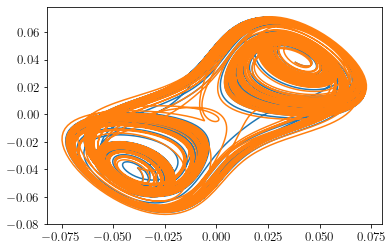

In [322]:
plt.plot(sol_1_pade.y[0,:], sol_1_pade.y[1,:], '-')
plt.plot(sol_2_pade.y[0,:], sol_2_pade.y[1,:], '-')

In [323]:
numberPeriods = 600
numberPointsPerPeriod = 100
endTime = numberPeriods*timescale;
nSamp = numberPeriods*numberPointsPerPeriod+1
dt = endTime/(nSamp-1);
timespan = np.linspace(0, endTime, nSamp)

In [324]:
sol_1_pade_long = solve_ivp(odeint_pade_forced, [0,endTime], ic_chaot1_reduced, t_eval = timespan, method = 'LSODA', rtol = 1e-8, atol = 1e-10)



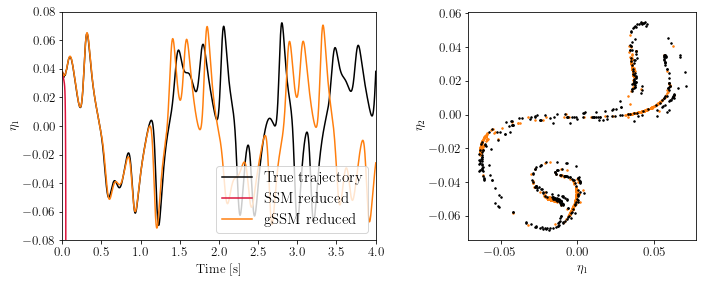

In [326]:
aspect_ratio = 443/173
width = 10.5521
ff = plt.figure(figsize = (width,width/aspect_ratio))
ax = ff.add_subplot(121)
ax2 = ff.add_subplot(122)

#ax2 = ff.add_subplot(122)

ax.plot(sol_1_pade.t, reduced_traj1[0,:], '-', c='black', label = 'True trajectory')
ax.plot(sol_chaotic_taylor_1.t, sol_chaotic_taylor_1.y[1,:], '-', c='crimson', label = 'SSM reduced')
ax.plot(sol_1_pade.t, sol_1_pade.y[1,:], '-', c='C1', label = 'gSSM reduced')
ax.legend(loc = 'lower right', fontsize = 15)
ax.set_ylim(-0.08, 0.08)

ax2.plot(sol_1_pade_long.y[0,::100], sol_1_pade_long.y[1,::100], '.', c='C1', markersize = 3, label = 'Reduced trajectory (Padé)')
ax2.plot(sol_1_pade.y[0,::100], sol_1_pade.y[1,::100], '.', c='C1', markersize = 3, label = 'Reduced trajectory (Padé)')
ax2.plot(sol_2_pade.y[0,::100], sol_2_pade.y[1,::100], '.', c='C1', markersize = 3, label = 'Reduced trajectory (Padé)')
ax2.plot(reduced_traj2[1,::100], reduced_traj2[0,::100], '.', c='black', markersize = 3, label = 'True trajectoroy')
ax2.plot(reduced_traj1[1,::100], reduced_traj1[0,::100], '.', c='black', markersize = 3, label = 'True trajectoroy')

#ax.legend(loc = 'lower right')
ax2.set_xlabel('$\eta_1$')
ax2.set_ylabel('$\eta_2$')

ax.set_xlim(0, 4)
#ax2.set_xlim(0, 15)
ax.set_xlabel('Time [s]')
ax.set_ylabel('$\eta_1$')
ax2.set_aspect(1.1)
plt.tight_layout()
#plt.savefig('figs/chaotic_forced_only_poincare_mid_load_fixed_proj.pdf',bbox_inches='tight')


Text(0, 0.5, '$\\eta_1$')

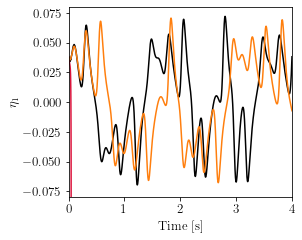

In [225]:
ff = plt.figure(figsize = (4,3.5))
ax = ff.add_subplot(111)

ax.plot(timespan, reduced_traj1[0,:], '-', c='black', label = 'True trajectory')
ax.plot(sol_chaotic_taylor_1.t, sol_chaotic_taylor_1.y[1,:], '-', c='crimson', label = 'Reduced trajectory (Taylor)')
ax.plot(timespan, sol_2_pade.y[1,:], '-', c='C1')
ax.set_xlim(0, 4)
ax.set_ylim(-0.08, 0.08)

ax.set_xlabel('Time [s]')
ax.set_ylabel('$\eta_1$')


In [226]:
signal_true = reduced_traj1[1,:] - np.mean(reduced_traj1[1,:])
signal_pade = sol_1_pade.y[0,:] - np.mean(sol_1_pade.y[0,:])

frequencies = np.fft.fftfreq(len(signal_true), d=dt)
ff_true = np.fft.fft(signal_true)
ff_reduced = np.fft.fft(signal_pade)
positive_frequencies = frequencies[frequencies >= 0]
positive_power_spectrum_true = ff_true[frequencies >= 0]
positive_power_spectrum_reduced = ff_reduced[frequencies >= 0]

Text(0, 0.5, 'Power spectral density')

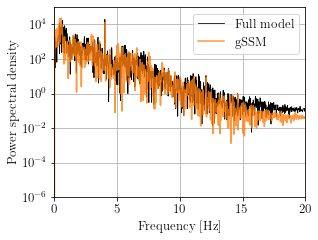

In [227]:
ff = plt.figure(figsize = (4.5,3.5))
ax = ff.add_subplot(111)

ax.semilogy(positive_frequencies, np.abs(positive_power_spectrum_true)**2, '-', c='black',label = 'Full model', linewidth =0.8)
ax.semilogy(positive_frequencies, np.abs(positive_power_spectrum_reduced)**2, '-', c='C1',label = 'gSSM', alpha = 0.8)
ax.set_xlim(0, 20)
ax.set_ylim(1e-6, 1e5)
ax.grid()
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power spectral density')



## Nonaoutonomous correction

In [76]:

mat_na = loadmat('vonkarman_buckled_mid_load_order2_nonaut.mat')


In [77]:
import sympy as sy
p1, p2 = sy.symbols('p_1 p_2')
var = np.array([p1,p2]).reshape(-1,1)

In [78]:
def reduced_to_full(p, W0):
    N = np.shape(W0[0]['coeffs'])[0]
    z = np.zeros((N,1))*p[0]
    for i in range(len(W0)):
        if len(W0[i]['coeffs'])>0:
            if W0[i]['coeffs'].shape[1]>0:
                z += expand_multiindex(W0[i], p)
    return z

In [79]:
def extract_gen_new_na(matt,harmonic_index, label):
    mat_array = []
    matt = matt[label][harmonic_index][0][1]
    order = len(matt)
    for i in range(order):
        dictt = {}
        if matt['coeffs'][i].shape[0]>0:
            if isinstance(matt['coeffs'][i][0], sp.sparse.spmatrix):
                dictt['coeffs'] = matt['coeffs'][i][0].toarray()
            else:
                dictt['coeffs'] = matt['coeffs'][i]
            if isinstance(matt['ind'][i][0], sp.sparse.spmatrix):
                dictt['ind'] = np.array(matt['ind'][i][0].toarray(), dtype=int)
            else:
                dictt['ind'] = np.array(matt['ind'][i][0], dtype= int)
#            dictt['ind'] = matt['ind'][i][0].toarray()
        else:
            dictt['coeffs'] = []
            dictt['ind'] = []
        mat_array.append(dictt)
    return mat_array


In [196]:
R11 = extract_gen_new_na(mat_na, 0,  'R1') # get reduced dyn


In [197]:
R12 = extract_gen_new_na(mat_na, 1,  'R1') 


In [199]:
k1_expression = reduced_to_full(var, R11)
k2_expression = reduced_to_full(var, R12)

In [200]:
forcing_vector_11 = sy.lambdify([p1, p2], k1_expression[0][0], 'numpy')
forcing_vector_12 = sy.lambdify([p1, p2], k1_expression[1][0], 'numpy')
forcing_vector_21 = sy.lambdify([p1, p2], k2_expression[0][0], 'numpy')
forcing_vector_22 = sy.lambdify([p1, p2], k2_expression[1][0], 'numpy')

In [202]:
red_dynamics_nonaut_k1 = return_parametrization_up_to_order_Taylor(k1_expression,max_order = 18)


In [203]:
red_dynamics_nonaut_k2 = return_parametrization_up_to_order_Taylor(k2_expression,max_order = 18)


In [204]:
nonaout_pade_k1 = generate_parametrization(red_dynamics_nonaut_k1,
                                                order_num = 5,
                                                order_denom = 5,
                                                use_robust = True)

In [205]:
nonaout_pade_k2 = generate_parametrization(red_dynamics_nonaut_k2,
                                                order_num = 5,
                                                order_denom = 5,
                                                use_robust = True)

In [206]:
amp_ssm =  0.2267033242968807


In [327]:
amp_full = 21.1154
def odeint_pade_forced_NA(t, x):
    phase = frq_ * t
    autonomous = np.array([red_dyn_pade[0].evaluate(x.reshape(1,-1)),
                   red_dyn_pade[1].evaluate(x.reshape(1,-1))]).ravel()
    forcing = np.array([nonaout_pade_k1[0].evaluate(x.reshape(1,-1)) * np.exp(1j*phase) 
                        + nonaout_pade_k2[0].evaluate(x.reshape(1,-1)) * np.exp(-1j*phase),
                   nonaout_pade_k1[1].evaluate(x.reshape(1,-1))*np.exp(1j*phase) + 
                       nonaout_pade_k2[1].evaluate(x.reshape(1,-1)) * np.exp(-1j*phase)]).ravel()
    return autonomous + amp_full*np.real(forcing)





In [328]:
sol_1_pade_nonautonomous = solve_ivp(odeint_pade_forced_NA, [0,endTime], ic_chaot1_reduced, t_eval = timespan, method = 'DOP853')
sol_2_pade_nonautonomous = solve_ivp(odeint_pade_forced_NA, [0,endTime], ic_chaot2_reduced, t_eval = timespan, method = 'DOP853')



In [329]:
color_orange = '#dd571c'

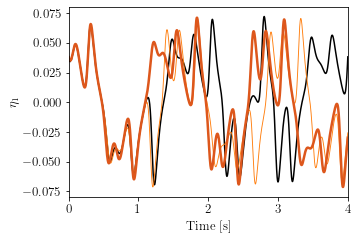

In [330]:
ff = plt.figure(figsize = (5,3.5))
ax = ff.add_subplot(111)

ax.plot(timespan, reduced_traj1[0,:], '-', c='black', label = 'True trajectory')
#ax.plot(timespan, sol_chaotic_taylor_1.y[1,:], '-', c='crimson', label = 'Reduced trajectory (Taylor)')
ax.plot(timespan, sol_1_pade.y[1,:], '-',linewidth = 0.9,  c='C1')
ax.plot(timespan, sol_1_pade_nonautonomous.y[1,:], '-',linewidth =2.5,  c=color_orange)
ax.set_xlim(0, 4)
ax.set_xlabel('Time [s]')
ax.set_ylabel('$\eta_1$')
plt.savefig('')

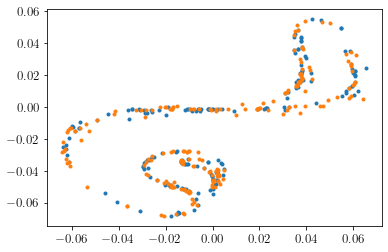

In [332]:
plt.plot(sol_1_pade_nonautonomous.y[0,::100], sol_1_pade_nonautonomous.y[1,::100], '.')
plt.plot(sol_2_pade_nonautonomous.y[0,::100], sol_2_pade_nonautonomous.y[1,::100], '.')

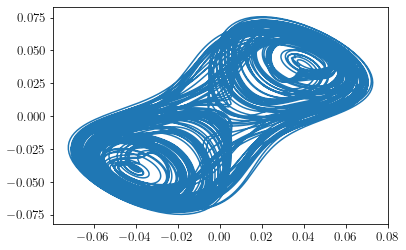

In [333]:
plt.plot(reduced_traj1[0,:], reduced_traj1[1,:])

In [334]:
signal_true = reduced_traj1[1,:] - np.mean(reduced_traj1[1,:])
signal_pade = sol_1_pade.y[0,:] - np.mean(sol_1_pade.y[0,:])

frequencies = np.fft.fftfreq(len(signal_true), d=dt)
ff_true = np.fft.fft(signal_true)
ff_reduced = np.fft.fft(signal_pade)
positive_frequencies = frequencies[frequencies >= 0]
positive_power_spectrum_true = ff_true[frequencies >= 0]
positive_power_spectrum_reduced = ff_reduced[frequencies >= 0]

Text(0, 0.5, 'Power spectral density')

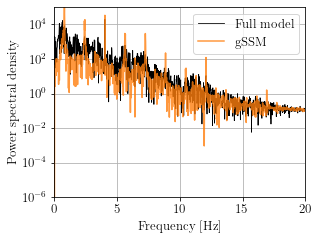

In [335]:
ff = plt.figure(figsize = (4.5,3.5))
ax = ff.add_subplot(111)

ax.semilogy(positive_frequencies, np.abs(positive_power_spectrum_true)**2, '-', c='black',label = 'Full model', linewidth =0.8)
ax.semilogy(positive_frequencies, np.abs(positive_power_spectrum_reduced)**2, '-', c='C1',label = 'gSSM', alpha = 0.8)
ax.set_xlim(0, 20)
ax.set_ylim(1e-6, 1e5)
ax.grid()
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power spectral density')



In [336]:
import scipy

In [337]:
scipy.__version__


'1.7.3'

In [338]:
import numpy

In [339]:
numpy.__version__


'1.20.3'